In [1]:
# Append system path
import sys, os
sys.path.append(os.path.abspath('../inference'))

from preprocessing import VideoPreprocessor
from object_detection import Model
from nms import NMS
import cv2 as cv
import matplotlib.pyplot as plt

weights_file = '../storage/yolo_model_1/yolov4-tiny-logistics_size_416_1.weights'
config_file = '../storage/yolo_model_1/yolov4-tiny-logistics_size_416_1.cfg'
names_file = '../storage/yolo_model_1/logistics.names'

preprocessor = VideoPreprocessor()
model = Model(weights_file, config_file, names_file)

In [2]:
# Load 5 images from the directory
image_paths = [
    "../storage/logistics/-_10_jpg.rf.7216b8fd23d002354ad6cdd0d7691cd5.jpg",
    "../storage/logistics/-6CFFD6FB-2A39-4815-8F6F-DFAC5E9F5DB8-png_jpg.rf.06ffcc635055394ce0cd6441207af66f.jpg",
    "../storage/logistics/-01-15-1-4-1-1-14_jpg.rf.2e89a06faa1c217b95a0e0d7177e8397.jpg",
    "../storage/logistics/net-11011-_jpg.rf.e68af4764ab8539e6ba0f2c36fe9f06f.jpg",
    "../storage/logistics/traffic-light-293-_jpg.rf.764e6927e7408c6bf58474f004c8ff8b.jpg"
]

images = [cv.imread(image_path) for image_path in image_paths]


## Raw Predictions

Here we set score_threshold to 0 to show the raw predictions

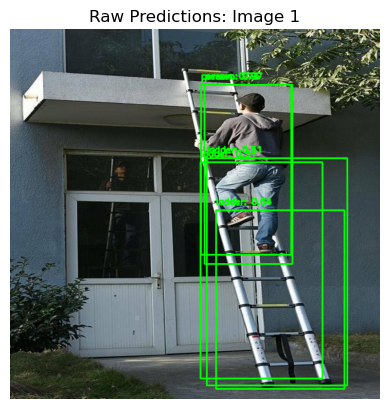

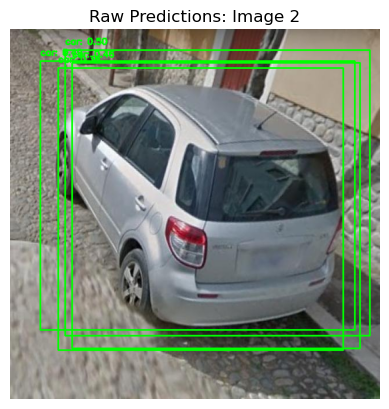

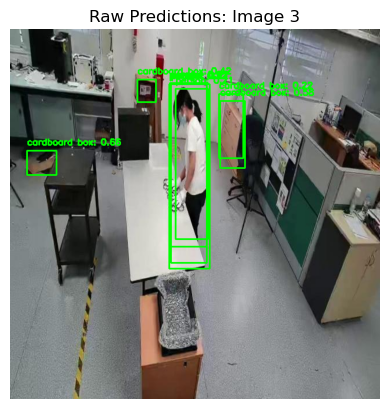

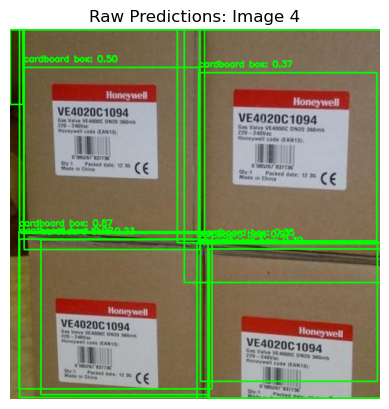

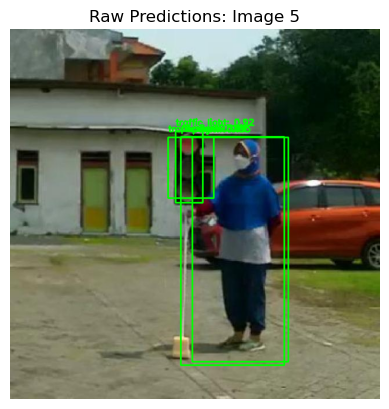

In [3]:
def display_image_with_boxes(image, bboxes, class_ids, scores, title="Predictions"):
    """Function to display image with bounding boxes"""
    for i, box in enumerate(bboxes):
        x, y, w, h = box
        label = f"{model.classes[class_ids[i]]}: {scores[i]:.2f}"
        cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv.putText(image, label, (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

# Run model predictions and display predictions
for idx, img in enumerate(images):
    outputs, original_size = model.predict(img)

    # Set score threshold to 0 to show raw predictions
    bboxes, class_ids, scores = model.post_process(outputs, original_size, score_threshold=0)
    
    # Display predictions without any filtering
    display_image_with_boxes(img.copy(), bboxes, class_ids, scores, title=f"Raw Predictions: Image {idx+1}")


## Post Processed Predictions

Here we set the score threshold to 0.5.


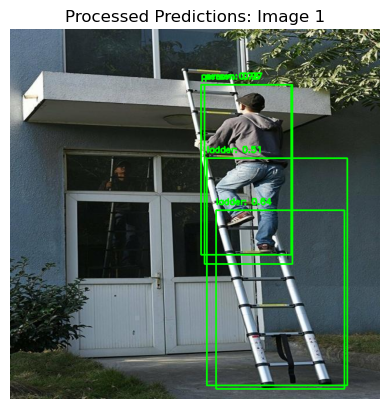

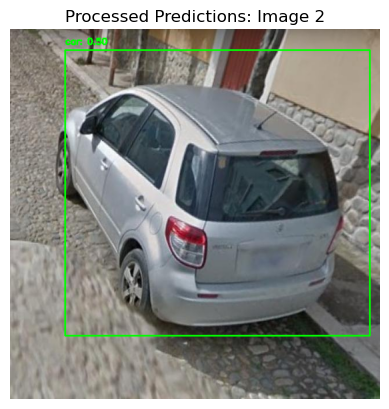

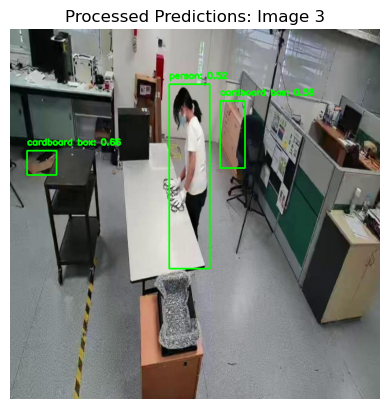

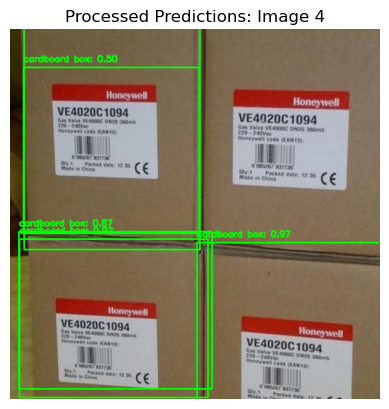

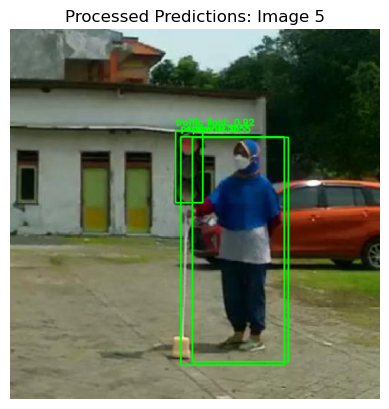

In [4]:
# Run model predictions and display predictions
for idx, img in enumerate(images):
    outputs, original_size = model.predict(img)

    # Set score threshold to 0.5 to post process predictions
    bboxes, class_ids, scores = model.post_process(outputs, original_size, score_threshold=0.5)
    
    # Display predictions
    display_image_with_boxes(img.copy(), bboxes, class_ids, scores, title=f"Processed Predictions: Image {idx+1}")

## NMS Filtered Images

Here we add the NMS filter with an IOU Threshold of 0.4

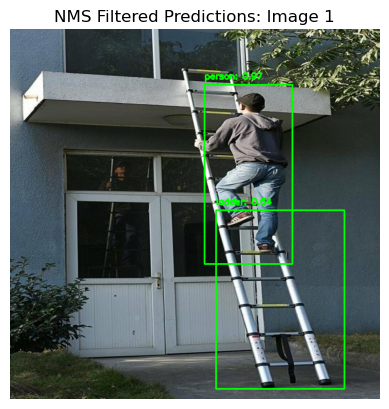

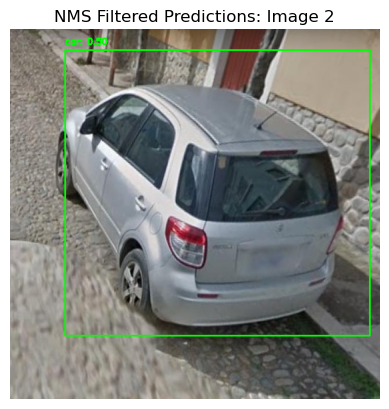

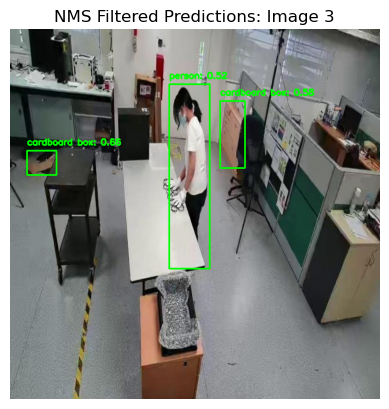

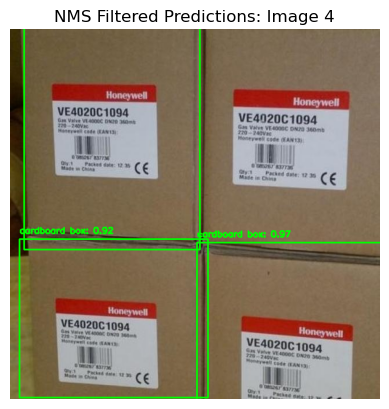

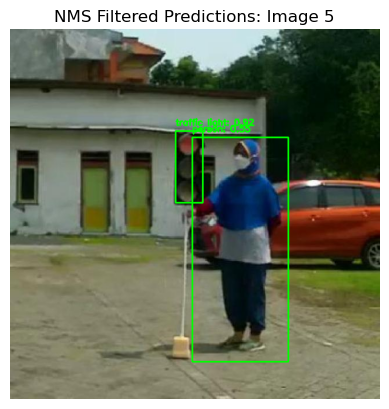

In [5]:
nms = NMS(nms_iou_threshold=0.4)

# Run model predictions and display predictions
for idx, img in enumerate(images):
    outputs, original_size = model.predict(img)

    # Set score threshold to 0.5 to post process predictions
    bboxes, class_ids, scores = model.post_process(outputs, original_size, score_threshold=0.5)
    # Apply NMS filtering to remove redundant bounding boxes
    filtered_bboxes, filtered_class_ids, filtered_scores = nms.filter(bboxes, class_ids, scores, )
    
    # Display predictions with NMS filtering
    display_image_with_boxes(img.copy(), filtered_bboxes, filtered_class_ids, filtered_scores, title=f"NMS Filtered Predictions: Image {idx+1}")